NASDAQ Composite
America/New_York


Train score :  0.5905558876270174
Test score :  0.551373954599761
Cross-validation scores: [0.55017921 0.49312612 0.53676031 0.54632397 0.54991034]
Mean cross-validation score: 0.5352599905306074


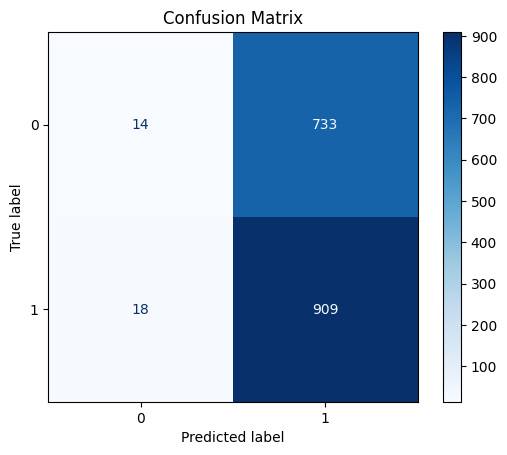

      Feature  Importance
0  Pct_Change    0.185050
6      RSI_ta    0.144532
1     std_dev    0.134507
5        MACD    0.132619
2       MA200    0.118381
7         VIX    0.098836
4        MA10    0.096632
3        MA50    0.089444
Train Accuracy: 0.6925, Test Accuracy: 0.552
Cross-validation scores: [0.55017921 0.49312612 0.53676031 0.54632397 0.54991034]
Mean cross-validation score: 0.5352599905306074
Ensemble Train score: 0.588314405260012
Ensemble Test score: 0.5352449223416965
Ensemble Cross-validation scores: [0.55017921 0.47937836 0.54213987 0.54991034 0.54991034]
Ensemble Mean cross-validation score: 0.534303624720685
Ensemble Train score: 0.5566347878063359
Ensemble Test score: 0.5567502986857825
Ensemble Cross-validation scores: [0.55017921 0.5469217  0.54931261 0.54991034 0.54991034]
Ensemble Mean cross-validation score: 0.5492468405007209
Model 1
Train score : 0.59056 
Test score  : 0.55137
CV Score    : 0.53526

Model 2
Train score : 0.69247 
Test score  : 0.55197
CV Sco

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19976\1053152405.py:623: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19976\1053152405.py:629: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Annual Return: 0.06878986834263956
Cumulative Returns: 8.100490157988135
Annual Volatility: 0.15132622197031304
Sharpe Ratio: 0.5154579091706835
Sortino Ratio: 0.7324423915888953
Max Drawdown: -0.3639527990912014
Calmar Ratio: 0.1890076639454607


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19976\1053152405.py:687: FutureWarning:

The 'method' keyword in Series.replace is deprecated and will be removed in a future version.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19976\1053152405.py:687: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19976\1053152405.py:690: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19976\1053152405.py:693: SettingWithCopyWarning:


A value

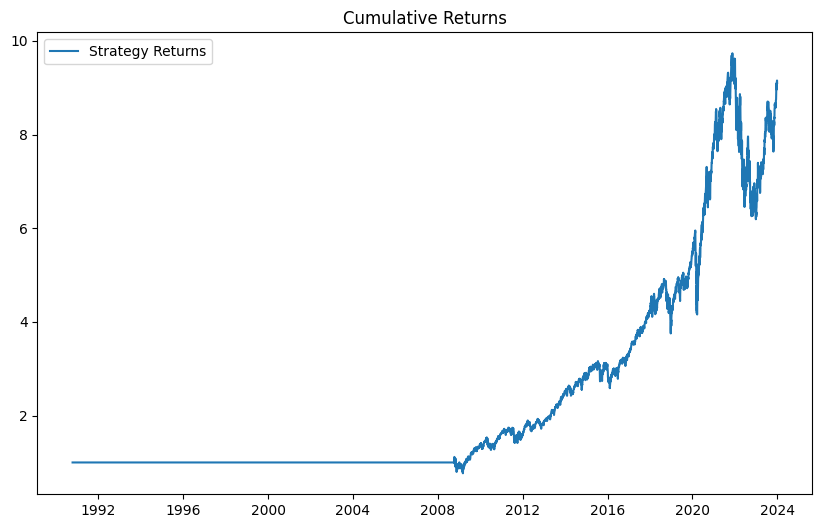

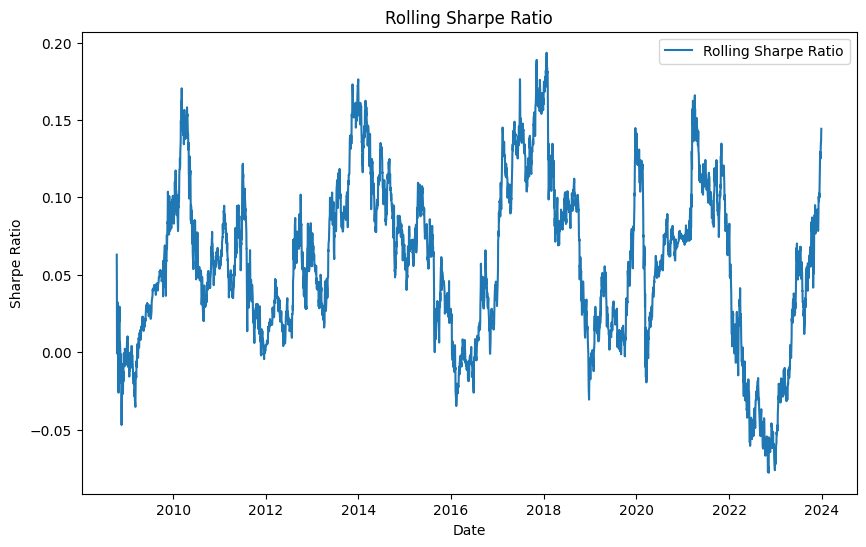

Mean of Rolling Sharpe Ratio: 0.058088569575343134


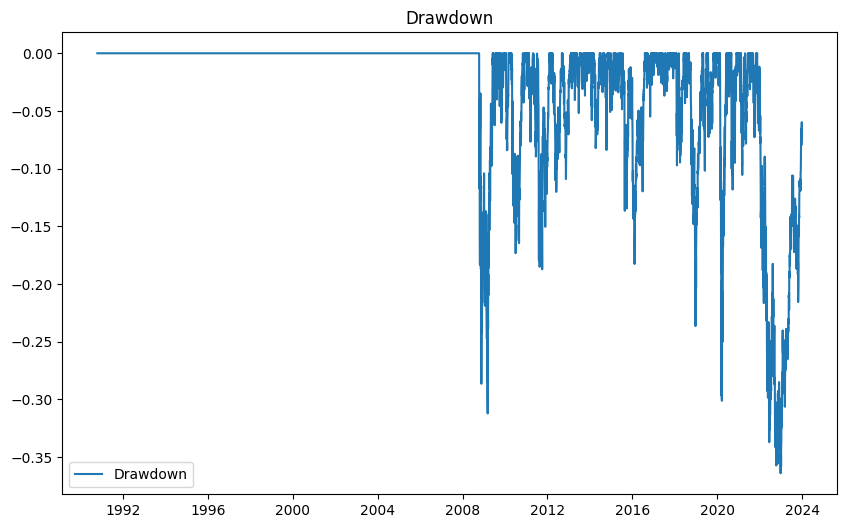

-0.029539067720120882

Maximum drawdown :  -0.3639527990912013
Open                3.285000e+02
High                3.297000e+02
Low                 3.250000e+02
Close               3.254000e+02
Volume              1.171300e+08
MACD               -1.323186e+01
Pct_Change         -1.244311e+00
RSI                 3.084111e+01
RSI_EMA             2.290515e+01
RSI_ta              2.530560e+01
MA10                3.377400e+02
MA50                3.704900e+02
MA200               4.233571e+02
MA20                3.464800e+02
std_dev             1.320529e+01
Upper_BB            3.728906e+02
Lower_BB            3.200694e+02
Target              1.000000e+00
VIX                 3.164000e+01
Signal              0.000000e+00
Position            0.000000e+00
Strategy_Returns   -0.000000e+00
Name: 1990-10-16 00:00:00-04:00, dtype: float64


In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyfolio as pf
import pandas_ta as ta
import seaborn as sns

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier


import empyrical as ep
import seaborn as sns
import datetime
import plotly.express as px
import plotly.graph_objects as go

dft = yf.Ticker("^IXIC") ## NASDAQ Composite 0.07133
# dft = yf.Ticker("^DJI") ## DOWN JONES 0.049
# dft = yf.Ticker("^GSPC") ## S&P-500 0.054
# dft = yf.Ticker("000001.SS") ## China SSE 0.017
# dft = yf.Ticker("^FTSE") ## LONDON FTSE 0.022
# dft = yf.Ticker("^XAX") ## NEW YORK 0.0500
# dft = yf.Ticker("^NYA") ## NEW YORK 0.0349
# dft = yf.Ticker("^N100") ## EURO NEXT 100  0.044
# dft = yf.Ticker("NVDA") ## NVIDIA 0.32

# dft = yf.Ticker("^SET.BK") ## SET BKK 0.07
# dft = yf.Ticker("^SET50.BK") ## SET50 BKK 0.0909
# dft = yf.Ticker("TDEX.BK") ## 
# dft = yf.Ticker("TISCO.BK") ## BKK 0.1531
# dft = yf.Ticker("BH.BK") ## BAMRUNGRAD HOSPITAL 0.14

ticker_name = dft.info.get("longName", "Unknown Ticker")
print(ticker_name)

# # Define the start and end dates for the data
startDate = "1990-01-01"
endDate = "2024-01-01"

timeZone = dft.info.get("timeZoneFullName")
print(timeZone)

df = dft.history(interval="1d", start=startDate, end=endDate)

# Comparing Timestamp
# start_timestamp = int(datetime.datetime.strptime(startDate, "%Y-%m-%d").timestamp())
# print(start_timestamp)
# timestamp1 = 315550800
# timestamp2 = 315507600
# date1 = datetime.datetime.fromtimestamp(timestamp1)
# date2 = datetime.datetime.fromtimestamp(timestamp2)
# print(f"Timestamp 1: {timestamp1} -> Date 1: {date1}")
# print(f"Timestamp 2: {timestamp2} -> Date 2: {date2}")
# Drop Dividends column
df.drop(columns=['Dividends'], inplace=True)

# Drop Stock Splits column
df.drop(columns=['Stock Splits'], inplace=True)

df
## Calculate EMA-12 and EMA-26 using Exponential Weighing Average (EWM)
# df['EMA-12'] = df['Close'].ewm(span = 12, adjust = False).mean()
# df['EMA-26'] = df['Close'].ewm(span = 26, adjust = False).mean()

## Calculate MACD 
# df['MACD'] = df['EMA-12'] - df['EMA-26']
df['MACD'] = ta.macd(df['Close'], fast=12, slow=26, signal=9)['MACD_12_26_9']
df['Pct_Change'] = df['Close'].pct_change() * 100

## Calculate RSI using formula
## RSI = 100 – [100 ÷ ( 1 + (Average Gain During Up Periods ÷ Average Loss During Down Periods ))]

delta = df['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
df['RSI'] = 100 - (100 / (1 + rs))

delta = df['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

# Calculate the Exponential Moving Average of gains and losses
avg_gain = gain.ewm(span=14, min_periods=14).mean()
avg_loss = loss.ewm(span=14, min_periods=14).mean()

# Calculate the RS and RSI
rs = avg_gain / avg_loss
df['RSI_EMA'] = 100 - (100 / (1 + rs))

df['RSI_ta'] = ta.rsi(df['Close'], length=14)

df['MA10'] = df.ta.sma(length=10)
df['MA50'] = df.ta.sma(length=50)
df['MA200'] = df.ta.sma(length=200)

## Calculate Boilinger Bands
window = 20
df['MA20'] = df['Close'].rolling(window=window).mean()
df['std_dev'] = df['Close'].rolling(window=window).std()
df['Upper_BB'] = df['MA20'] + (df['std_dev'] * 2)
df['Lower_BB'] = df['MA20'] - (df['std_dev'] * 2)
df[['Close', 'MACD', 'RSI','RSI_EMA','RSI_ta']]
# Create target variable: 1 if next day's close is higher than today's, else 0
df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)
# Fetch VIX index data
vix = yf.Ticker("^VIX")
vix_df = vix.history(interval="1d", start=startDate, end=endDate)

vix_df['Pct_Change'] = vix_df['Close'].pct_change() * 100

# print(vix_df['Pct_Change'].max())


import pytz

# Get the time zone of the stock's exchange
stock_timezone = pytz.timezone(timeZone)

# Convert the time zone of the VIX DataFrame to match the time zone of the stock's exchange
vix_df.index = vix_df.index.tz_convert(stock_timezone)

# Align the timestamps of the VIX data to match those of your DataFrame
vix_df = vix_df.reindex(df.index, method='ffill')

# Merge VIX close prices into the original DataFrame
df['VIX'] = vix_df['Close']



# # df.index = df.index.tz_convert('UTC')
# # # vix_df.index = vix_df.index.tz_convert('UTC')
# # # vix_df.index = vix_df.index.tz_convert('Asia/Bangkok')
# # vix_df.index = vix_df.index.tz_convert('Asia/Beijing')

# # # Shift the timestamps of vix_df by one hour
# # vix_df.index = vix_df.index - pd.Timedelta(hours=1)


# # # Merge VIX close prices into the original DataFrame
# # # df['VIX'] = vix_df['Close']

# # df = df.join(vix_df[['Close']], rsuffix='_VIX')

# # Rename the VIX close column
# df.rename(columns={'Close_VIX': 'VIX'}, inplace=True)

vix_df
df
# plt.figure(figsize=(20,6))
# plt.plot(df['Close'], label="Closed Price")
# mx = df['Close'].max()
# plt.plot(vix_df['Close'] * mx / 100, label="VIX Index")
# plt.legend()
# plt.title(f"VIX Index and {ticker_name} Price (Adjusted Index)")
# plt.show()

# Create the plotly figure
fig = go.Figure()

# Add the closed price line
fig.add_trace(go.Scatter(
    x=df.index, 
    y=df['Close'], 
    mode='lines', 
    name='Closed Price',
    hovertemplate='%{x|%Y-%m-%d}<br>Price: %{y}'
))

mx = df['Close'].max()

# Add the VIX index line, Scaled out of Max stock price
fig.add_trace(go.Scatter(
    x=vix_df.index, 
    y=vix_df['Close'] * mx / 100, 
    mode='lines', 
    name='VIX',
    hovertemplate='%{x|%Y-%m-%d}<br>VIX Index: %{customdata:.2f}',
    customdata=vix_df['Close']  # Use the real VIX values as customdata
))

# Update layout
fig.update_layout(
    title=f"VIX Index to {ticker_name} Price (Adjusted Index)",
    xaxis_title="Date",
    yaxis_title="Price",
    legend_title="Legend",
    width=4900,
    height=700
)

# Show the plot
fig.show()
# plt.figure(figsize=(25,10))
# plt.plot(vix_df['Pct_Change'], label="VIX Index")
# plt.legend()
# plt.title("VIX Index Percentage Change")
# plt.show()

fig = go.Figure()
fig.add_trace(go.Scatter(x=vix_df.index, y=vix_df['Pct_Change'], mode='lines', name='Percentage Change'))
fig.update_layout(
    title=f"VIX Index Percentage Change",
    xaxis_title="Date",
    yaxis_title="Percentage Change",
    legend_title="Legend",
    width=3500,
    height=700
)

fig.show()


# print("Main DataFrame Index:", df.index)
# print("VIX DataFrame Index:", vix_df.index)
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df.index,
    y=df['Close'],
    mode='lines',
    line=dict(color='cyan'),
    name=f"{ticker_name} Price")
)

fig.update_layout(
    title=f"{ticker_name} Price",
    xaxis_title="Date",
    yaxis_title="Price",
    width=1200,
    height=600
)

fig.show()

import plotly.graph_objects as go

fig = go.Figure()

# Plot the VIX index
fig.add_trace(go.Scatter(
    x=vix_df.index,
    y=vix_df['Close'],
    mode='lines',
    line=dict(color='purple'),
    name='VIX Index')
)

prev_vix = None
gt_vix_date = []
xtr_vix_date = []

# Iterate through the VIX data
for date, vix_value in vix_df['Close'].items():
    if vix_value >= 65 and (prev_vix is None or prev_vix < 65):
        fig.add_trace(go.Scatter(
            x=[date],
            y=[vix_value],
            mode='markers',
            marker=dict(color='green', symbol='x'),
            name=str(date)  # Convert Timestamp to string
        ))
        xtr_vix_date.append([date, vix_value])
    elif vix_value >= 35 and (prev_vix is None or prev_vix < 35):
        fig.add_trace(go.Scatter(
            x=[date],
            y=[vix_value],
            mode='markers',
            marker=dict(color='red', symbol='circle'),
            name=str(date)  # Convert Timestamp to string
        ))
        gt_vix_date.append([date, vix_value])
    prev_vix = vix_value

fig.update_layout(
    title="VIX Index",
    xaxis_title="Date",
    yaxis_title="VIX Value",
    width=4200,
    height=600
)

fig.show()

# Remove any row with NaN value
df = df.dropna()

# Print out list where the VIX is greater than 30
gt_vix = df[df['VIX'] > 30]
# gt_vix

gt_vix_df = pd.DataFrame(gt_vix_date, columns=['Date', 'VIX'])
gt_vix_df.set_index('Date', inplace=True)

# Convert xtr_vix_date to DataFrame
xtr_vix_df = pd.DataFrame(xtr_vix_date, columns=['Date', 'VIX'])
xtr_vix_df.set_index('Date', inplace=True)

# df['VIX_35'] = df.index.isin(gt_vix_df.index)
# df['VIX_65'] = df.index.isin(xtr_vix_df.index)
df
# Prepare the feature set and target variable
X = df[['Pct_Change', 'std_dev', 'MA200', 'MA50', 'MA10', 'MACD', 'RSI_ta', 'VIX']]
# X = df[['MA200', 'MA50', 'MA10', 'MACD2', 'RSI_ta', 'VIX', 'VIX_35', 'VIX_65']]
# X = df[['SMA200', 'SMA50', 'SMA10', 'MACD', 'RSI', 'VIX', 'VIX_35', 'VIX_65', 'MA20', 'Lower_BB', 'Upper_BB']]
y = df['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the RandomForestClassifier
model = RandomForestClassifier(
    n_estimators=100, 
    random_state=42, 
    max_depth=5, 
    min_samples_leaf=1, 
    min_samples_split=10
)

model.fit(X_train, y_train)

print("Train score : ", model.score(X_train,y_train))
print("Test score : ", model.score(X_test,y_test))

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

y_pred = model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
# Check feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(feature_importance.sort_values(by='Importance', ascending=False))

# Hyperparameter tuning example using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7, 9, 11, 13, 15],
    'min_samples_split': [1, 2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)
# print("Best parameters found: ", grid_search.best_params_)
# print("Best cross-validation score: ", grid_search.best_score_)

# # Re-train the model with the best parameters
# best_model = grid_search.best_estimator_
# best_model.fit(X_train, y_train)
# print("Train score with best parameters: ", best_model.score(X_train, y_train))
# print("Test score with best parameters: ", best_model.score(X_test, y_test))



# Output

# Feature  Importance
# 4     RSI    0.207028
# 3    MACD    0.173785
# 5     VIX    0.161541
# 0  SMA200    0.156257
# 2   SMA10    0.150279
# 1   SMA50    0.146876
# 6  VIX_35    0.002741
# 7  VIX_65    0.001494
# Fitting 3 folds for each of 54 candidates, totalling 162 fits
# Best parameters found:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
# Best cross-validation score:  0.513870182753551
# Train score with best parameters:  0.5857438016528925
# Test score with best parameters:  0.5050147492625369
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Initialize XGBClassifier
xgb_model = XGBClassifier(random_state=42)

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [3, 5, 7],            # Maximum depth of a tree
    'learning_rate': [0.1, 0.01, 0.001], # Learning rate
    'subsample': [0.8, 0.9],           # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 0.9],    # Subsample ratio of columns when constructing each tree
    'gamma': [0.1, 0.2],               # Minimum loss reduction required to make a further partition
    'reg_alpha': [0.1, 0.2],           # L1 regularization term on weights
    'reg_lambda': [0.1, 0.2]           # L2 regularization term on weights
}

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # Get the best parameters and score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# # Print the best parameters and score
# print("Best Parameters:", best_params)
# print("Best Score:", best_score)

# # Evaluate the model with the best parameters
# best_xgb_model = grid_search.best_estimator_
# print("XGB Train score:", best_xgb_model.score(X_train, y_train))
# print("XGB Test score:", best_xgb_model.score(X_test, y_test))

pipe = Pipeline([
    ("scaler", MinMaxScaler()), 
    ("classifier", KNeighborsClassifier())
]) 
pipe.fit(X_train, y_train)
class_names = pipe.classes_
class_names
y_pred = pipe.predict(X_test)
acc_train = accuracy_score(y_train, pipe.predict(X_train))
acc_test = accuracy_score(y_test, y_pred)
print(f'Train Accuracy: {acc_train:0.4}, Test Accuracy: {acc_test:0.4}')

md2_cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", md2_cv_scores)
print("Mean cross-validation score:", md2_cv_scores.mean())
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

# Define the models
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
xgb = XGBClassifier(random_state=42, n_estimators=100, max_depth=5, learning_rate=0.00825)

# Create the ensemble
ensemble_model1 = VotingClassifier(estimators=[('rf', rf), ('xgb', xgb)], voting='soft')

# Fit the ensemble
ensemble_model1.fit(X_train, y_train)

# Evaluate the ensemble
print("Ensemble Train score:", ensemble_model1.score(X_train, y_train))
print("Ensemble Test score:", ensemble_model1.score(X_test, y_test))

# Cross-validation
ensemble1_cv_scores = cross_val_score(ensemble_model1, X, y, cv=5)
print("Ensemble Cross-validation scores:", ensemble1_cv_scores)
print("Ensemble Mean cross-validation score:", ensemble1_cv_scores.mean())

from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


# Define hyperparameters grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define hyperparameters grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001, 0.005, 0.0025, 0.00125],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
    'gamma': [0.1, 0.2],
    'reg_alpha': [0.1, 0.2],
    'reg_lambda': [0.1, 0.2]
}

# Define models
# rf = RandomForestClassifier(random_state=42)
# xgb = XGBClassifier(random_state=42)

gridSearch = False

rf = RandomForestClassifier(random_state=42, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=91)
xgb = XGBClassifier(random_state=42, colsample_bytree=0.8, gamma=0.1, learning_rate=0.001, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8)

# Perform GridSearchCV for Random Forest
if gridSearch:
    rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    rf_grid_search.fit(X_train, y_train)
    best_rf = rf_grid_search.best_estimator_
else: 
    rf.fit(X_train, y_train)

# Perform GridSearchCV for XGBoost
if gridSearch:
    xgb_grid_search = GridSearchCV(estimator=xgb, param_grid=xgb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    xgb_grid_search.fit(X_train, y_train)
    best_xgb = xgb_grid_search.best_estimator_
else:
    xgb.fit(X_train, y_train)

# Create the ensemble with best estimators
ensemble_model = VotingClassifier(estimators=[('rf', rf), ('xgb', xgb)], voting='soft')
ensemble_model.fit(X_train, y_train)

# Evaluate the ensemble
print("Ensemble Train score:", ensemble_model.score(X_train, y_train))
print("Ensemble Test score:", ensemble_model.score(X_test, y_test))

# Cross-validation
ensemble_cv_scores = cross_val_score(ensemble_model, X, y, cv=5)
print("Ensemble Cross-validation scores:", ensemble_cv_scores)
print("Ensemble Mean cross-validation score:", ensemble_cv_scores.mean())

# print(rf_grid_search.best_params_)
# {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

# print(xgb_grid_search.best_params_)
# {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 0.8}
print("Model 1")
print(f"Train score : {model.score(X_train,y_train):0.5} \nTest score  : {model.score(X_test,y_test):0.5}")
print(f"CV Score    : {cv_scores.mean():0.5}\n")

print("Model 2")
print(f"Train score : {acc_train:0.5} \nTest score  : {acc_test:0.5}")
print(f"CV Score    : {md2_cv_scores.mean():0.5}\n")

print("Model 3")
print(f"Train score : {ensemble_model1.score(X_train, y_train):0.5} \nTest score  : {ensemble_model1.score(X_test, y_test):0.5}")
print(f"CV Score    : {ensemble1_cv_scores.mean():0.5}\n")

print("Model 3")
print(f"Train score : {ensemble_model.score(X_train, y_train):0.5} \nTest score  : {ensemble_model.score(X_test, y_test):0.5}")
print(f"CV Score    : {ensemble_cv_scores.mean():0.5}\n")

import plotly.graph_objects as go

# Create the figure
fig = go.Figure()

# Add bars for each model with different colors
fig.add_trace(go.Bar(
    x=['Train', 'Test', 'CV'],
    y=[
        model.score(X_train, y_train), 
        model.score(X_test, y_test), 
        cv_scores.mean()
    ],
    name='Model 1',
    marker_color='blue',
    text=[model.score(X_train, y_train), model.score(X_test, y_test), cv_scores.mean()],
    textposition='auto'
))

fig.add_trace(go.Bar(
    x=['Train', 'Test', 'CV'],
    y=[
        acc_train, 
        acc_test, 
        md2_cv_scores.mean()
    ],
    name='Model 2',
    marker_color='orange',
    text=[acc_train, acc_test, md2_cv_scores.mean()],
    textposition='auto'
))

fig.add_trace(go.Bar(
    x=['Train', 'Test', 'CV'],
    y=[
        ensemble_model1.score(X_train, y_train), 
        ensemble_model1.score(X_test, y_test), 
        ensemble1_cv_scores.mean()
    ],
    name='Model 3',
    marker_color='green',
    text=[ensemble_model1.score(X_train, y_train), ensemble_model1.score(X_test, y_test), ensemble1_cv_scores.mean()],
    textposition='auto'
))

fig.add_trace(go.Bar(
    x=['Train', 'Test', 'CV'],
    y=[
        ensemble_model.score(X_train, y_train), 
        ensemble_model.score(X_test, y_test), 
        ensemble_cv_scores.mean()
    ],
    name='Model 4',
    marker_color='red',
    text=[ensemble_model.score(X_train, y_train), ensemble_model.score(X_test, y_test), ensemble_cv_scores.mean()],
    textposition='auto'
))

# Update the layout
fig.update_layout(
    title='Model Scores Comparison',
    xaxis_title='Score',
    yaxis_title='Score out of 1.0',
    barmode='group',
    legend_title='Models',
    xaxis=dict(
        tickmode='array',
        tickvals=['Train', 'Test', 'CV']
    )
)

# Show the plot
fig.show()

df['Signal'] = 0
# df.loc[X_test.index, 'Signal'] = model.predict(X_test) ## Model 1 Random Forest
# df.loc[X_test.index, 'Signal'] = ensemble_model1.predict(X_test) ## Model 2 Random Forest + XGBoost
df.loc[X_test.index, 'Signal'] = ensemble_model.predict(X_test) ## Model 3 More precise Random Forest + XGBoost 

# Initialize the 'Position' column
df['Position'] = 0

## Iterate through the DataFrame to apply the conditions
holding_position = False

## Condition 1

# for i in range(1, len(df)): 
#     if df.loc[df.index[i], 'VIX'] > 40:
#         if df.loc[df.index[i], 'VIX'] > 60 and not holding_position:
#             df.loc[df.index[i], 'Position'] = 1
#             holding_position = True
#         elif df.loc[df.index[i], 'VIX'] > 50 and holding_position:
#             df.loc[df.index[i], 'Position'] = 0
#             holding_position = False
#         elif df.loc[df.index[i], 'Signal'] == 1 and not holding_position:
#             df.loc[df.index[i], 'Position'] = 1
#             holding_position = True
#     elif (df.loc[df.index[i], 'VIX'] < 20 or df.loc[df.index[i], 'Signal'] == 0) and holding_position:
#         df.loc[df.index[i], 'Position'] = 0
#         holding_position = False
        
#     elif df.loc[df.index[i], 'Signal'] == 1 and not holding_position:
#         df.loc[df.index[i], 'Position'] = 1
#         holding_position = True
       
##  Condition 2

for i in range(1, len(df)):
    if df.loc[df.index[i], 'Signal'] == 1 and df.loc[df.index[i], 'VIX'] > 35 and not holding_position:
        df.loc[df.index[i], 'Position'] = 1
        holding_position = True
    elif (df.loc[df.index[i], 'VIX'] < 20 or df.loc[df.index[i], 'Signal'] == 0) and holding_position:
    # if (df.loc[df.index[i], 'VIX'] < 20 ) and holding_position:
        # print("Closing position VIX less than 30 at : ", df.index[i])
        df.loc[df.index[i], 'Position'] = 0
        # print(df.loc[df.index[i], 'Position'])
        holding_position = False
    elif df.loc[df.index[i], 'VIX'] > 45 and holding_position:
        df.loc[df.index[i], 'Position'] = 0
        holding_position = False
    elif df.loc[df.index[i], 'VIX'] > 60 and not holding_position:
        df.loc[df.index[i], 'Position'] = 1
        # print("hello", df.index[i])
        holding_position = True
        
# for i in range(1, len(df)):
#     if df.loc[df.index[i], 'Signal'] == 1:
#     # and not holding_position:
#         df.loc[df.index[i], 'Position'] = 0
#         # holding_position = True
#     elif  df.loc[df.index[i], 'Signal'] == 0:
#     # and holding_position:
#         df.loc[df.index[i], 'Position'] = 1
#         # holding_position = False


# Forward fill the positions to simulate holding positions
df['Position'] = df['Position'].replace(to_replace=0, method='ffill')

# Calculate strategy returns
df['Strategy_Returns'] = df['Position'].shift(1) * df['Close'].pct_change()

# Drop NaN values from returns
df.dropna(subset=['Strategy_Returns'], inplace=True)

# Calculate performance metrics
returns = df['Strategy_Returns']
cumulative_returns = (1 + returns).cumprod() - 1
perf_stats = {
    'Annual Return': ep.annual_return(returns),
    'Cumulative Returns': ep.cum_returns_final(returns),
    'Annual Volatility': ep.annual_volatility(returns),
    'Sharpe Ratio': ep.sharpe_ratio(returns),
    'Sortino Ratio': ep.sortino_ratio(returns),
    'Max Drawdown': ep.max_drawdown(returns),
    'Calmar Ratio': ep.calmar_ratio(returns)
}

# Print performance metrics
for metric, value in perf_stats.items():
    print(f"{metric}: {value}")
# Plot cumulative returns
cumulative_returns = ep.cum_returns(returns, starting_value=1.00)
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns, label='Strategy Returns')
plt.title('Cumulative Returns')
plt.legend()
plt.show()
# Calculate rolling Sharpe ratio
def rolling_sharpe_ratio(returns, window=252):
    return returns.rolling(window=window).mean() / returns.rolling(window=window).std()

# Calculate the rolling Sharpe ratio
rolling_sharpe = rolling_sharpe_ratio(returns)

# Plot the rolling Sharpe ratio
plt.figure(figsize=(10, 6))
plt.plot(rolling_sharpe, label='Rolling Sharpe Ratio')
plt.title('Rolling Sharpe Ratio')
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio')
plt.legend()
plt.show()

# Print the mean of the rolling Sharpe ratio
print('Mean of Rolling Sharpe Ratio:', rolling_sharpe.mean())
# Calculate drawdown
def calculate_drawdown(returns):
    cum_returns = (1 + returns).cumprod()
    peak = cum_returns.cummax()
    drawdown = (cum_returns - peak) / peak
    return drawdown

drawdown = calculate_drawdown(returns)
plt.figure(figsize=(10, 6))
plt.plot(drawdown, label='Drawdown')
plt.title('Drawdown')
plt.legend()
plt.show()

print(drawdown.mean())

print()
print("Maximum drawdown : ", drawdown.min())
print(df.loc[df.index[0]])
# df.to_csv("df.csv")
# returns.to_csv("returns.csv")